In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings as w
w.filterwarnings('ignore')

/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_1361.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_4264.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_7985.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_2060.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_9645.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_555.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_2729.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_9745.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_4115.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_7071.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_9367.png
/kaggle/input/doodle-augmented-data/AugData/val/Paper Plane/augmented_0_4610.png
/kaggle/input/doodle-augmente

In [2]:
import os
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Accuracy, AUC, Recall
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [3]:
# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define constants
image_size = (224, 224)
batch_size = 32
num_classes = 20
train_dir = '/kaggle/input/doodle-augmented-data/AugData/train'
val_dir = '/kaggle/input/doodle-augmented-data/AugData/val'
test_dir = '/kaggle/input/doodle-augmented-data/AugData/test'


# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    fill_mode='nearest'

)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    fill_mode='nearest'
    
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and split the data into train and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
)

Found 3991 images belonging to 20 classes.
Found 562 images belonging to 20 classes.
Found 1164 images belonging to 20 classes.


In [4]:
# Load the Xception model with pre-trained weights
base_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3),classes=num_classes)

# Set the layers of the pre-trained model to be non-trainable
base_model.trainable = False

# Build the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 1s 0us/step


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
Total params: 46,556,988
Trainable params: 25,695,508
Non-trainable params: 20,861,480
_________________________________________________________________


In [6]:
# Define early stopping
early_stopping = EarlyStopping(patience=3, monitor ='val_loss', restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
124/124 [==============================] - 88s 630ms/step - loss: 1.7826 - accuracy: 0.7820 - val_loss: 0.3906 - val_accuracy: 0.9007
Epoch 2/20
124/124 [==============================] - 67s 540ms/step - loss: 0.3292 - accuracy: 0.9225 - val_loss: 0.4731 - val_accuracy: 0.9173
Epoch 3/20
124/124 [==============================] - 65s 524ms/step - loss: 0.3336 - accuracy: 0.9255 - val_loss: 0.2769 - val_accuracy: 0.9136
Epoch 4/20
124/124 [==============================] - 61s 493ms/step - loss: 0.2522 - accuracy: 0.9409 - val_loss: 0.2324 - val_accuracy: 0.9246
Epoch 5/20
124/124 [==============================] - 61s 489ms/step - loss: 0.2147 - accuracy: 0.9518 - val_loss: 0.2318 - val_accuracy: 0.9393
Epoch 6/20
124/124 [==============================] - 60s 485ms/step - loss: 0.2312 - accuracy: 0.9472 - val_loss: 0.2396 - val_accuracy: 0.9467
Epoch 7/20
124/124 [==============================] - 59s 479ms/step - loss: 0.1816 - accuracy: 0.9568 - val_loss: 0.2758 - val_ac

[]

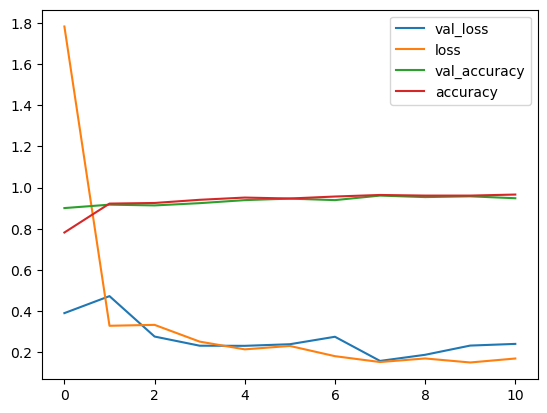

In [10]:
# Printing the metrics
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.plot()

In [11]:
model.evaluate_generator(test_generator)

[0.11797060072422028, 0.9716494679450989]

model.save('/kaggle/working/xception_model.h5')

In [12]:
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)


from sklearn.metrics import precision_score, recall_score, roc_auc_score

precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
auc_roc = roc_auc_score(true_labels, predictions, multi_class='ovr')

print('Precision: ',precision)
print('Recall: ',recall)
print('ROC_AUC: ',auc_roc)

37/37 [==============================] - 3s 91ms/step
Precision:  0.9715909638101664
Recall:  0.9713970589733542
ROC_AUC:  0.9995122157481058
